In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
price = pd.read_csv('price.csv')
train = pd.read_csv("Data_Train.csv")
test = pd.read_csv("Test_set.csv")

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
price.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


In [6]:
test['Price'] = price.Price

In [7]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934


In [8]:
df= train.append(test)

In [9]:
len(df['Additional_Info'].unique())

10

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


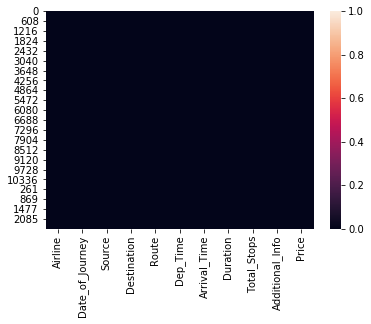

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = "most_frequent")

In [15]:
df['Route']=si.fit_transform(df['Route'].values.reshape(-1,1))

In [16]:
df['Total_Stops'] = si.fit_transform(df['Total_Stops'].values.reshape(-1,1))

In [17]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [18]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [19]:
df.Route.unique()

array(['BLR ? DEL', 'CCU ? IXR ? BBI ? BLR', 'DEL ? LKO ? BOM ? COK',
       'CCU ? NAG ? BLR', 'BLR ? NAG ? DEL', 'CCU ? BLR',
       'BLR ? BOM ? DEL', 'DEL ? BOM ? COK', 'DEL ? BLR ? COK',
       'MAA ? CCU', 'CCU ? BOM ? BLR', 'DEL ? AMD ? BOM ? COK',
       'DEL ? PNQ ? COK', 'DEL ? CCU ? BOM ? COK', 'BLR ? COK ? DEL',
       'DEL ? IDR ? BOM ? COK', 'DEL ? LKO ? COK',
       'CCU ? GAU ? DEL ? BLR', 'DEL ? NAG ? BOM ? COK',
       'CCU ? MAA ? BLR', 'DEL ? HYD ? COK', 'CCU ? HYD ? BLR',
       'DEL ? COK', 'CCU ? DEL ? BLR', 'BLR ? BOM ? AMD ? DEL',
       'BOM ? DEL ? HYD', 'DEL ? MAA ? COK', 'BOM ? HYD',
       'DEL ? BHO ? BOM ? COK', 'DEL ? JAI ? BOM ? COK',
       'DEL ? ATQ ? BOM ? COK', 'DEL ? JDH ? BOM ? COK',
       'CCU ? BBI ? BOM ? BLR', 'BLR ? MAA ? DEL',
       'DEL ? GOI ? BOM ? COK', 'DEL ? BDQ ? BOM ? COK',
       'CCU ? JAI ? BOM ? BLR', 'CCU ? BBI ? BLR', 'BLR ? HYD ? DEL',
       'DEL ? TRV ? COK', 'CCU ? IXR ? DEL ? BLR',
       'DEL ? IXU ? BOM ? COK', 'CCU 

In [20]:
#Converting date of journey into timestamp
df['Date_of_Journey']= pd.to_datetime(df['Date_of_Journey'])

In [21]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [22]:
df['Arrival_Time'] = df['Arrival_Time'].str.split(" ").str[0]

In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [24]:
df['Total_Stops']=df['Total_Stops'].replace("non-stop","0 Stop")

In [25]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,0 Stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [26]:
df['Halt'] = df['Total_Stops'].str.split(" ").str[0]

In [27]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Halt
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,0 Stop,No info,3897,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2 stops,No info,13882,2
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,1
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [28]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Halt                       object
dtype: object

In [29]:
df['Halt']= df['Halt'].astype(int)

In [30]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Halt                        int32
dtype: object

In [31]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Halt'],
      dtype='object')

In [32]:
#fair price depend on Airline,Source, Destination
df1=df.copy()

In [33]:
#df1[["Dep_Time",'Arrival_Time']]=pd.to_datetime(df1[["Dep_Time",'Arrival_Time']])
df1['hours']= df1['hours']*60

KeyError: 'hours'

In [34]:
df1['hours']=df1['Duration'].str.split("h").str[0]
df1['minutes']=df1['Duration'].str.split("h").str[1]
df1['minutes']=df1['minutes'].str.split('m').str[0]
#df1['hours']=df1['hours']*60
#df1['duration']=df1['hours'] + df1['minutes']

In [35]:
df1.head()
#df1['Arrival_Time']-df1['Dep_Time']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Halt,hours,minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,0 Stop,No info,3897,0,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2 stops,No info,13882,2,19,
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,1,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,4,45


In [36]:
#df1['Halt'].unique()

In [37]:
df['R1'] = df['Route'].str.split('?').str[0] 
df['R2'] = df['Route'].str.split('?').str[1] 
df['R3'] = df['Route'].str.split('?').str[2]
df['R4'] = df['Route'].str.split('?').str[3] 
df['R5'] = df['Route'].str.split('?').str[4]

In [38]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Halt,R1,R2,R3,R4,R5
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,0 Stop,No info,3897,0,BLR,DEL,NaN,NaN,NaN
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2 stops,No info,13882,2,DEL,LKO,BOM,COK,NaN
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,1,CCU,NAG,BLR,NaN,NaN
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,BLR,NAG,DEL,NaN,NaN


In [39]:
df['R1'].fillna('None',inplace=True)
df['R2'].fillna('None',inplace=True)
df['R3'].fillna('None',inplace=True)
df['R4'].fillna('None',inplace=True)
df['R5'].fillna('None',inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Halt,R1,R2,R3,R4,R5
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,0 Stop,No info,3897,0,BLR,DEL,None,None,None
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2,CCU,IXR,BBI,BLR,None
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2 stops,No info,13882,2,DEL,LKO,BOM,COK,None
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,1,CCU,NAG,BLR,None,None
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,BLR,NAG,DEL,None,None


In [40]:
df.drop('Route',axis=1,inplace=True)

In [41]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Halt,R1,R2,R3,R4,R5
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10,2h 50m,0 Stop,No info,3897,0,BLR,DEL,None,None,None
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,2,CCU,IXR,BBI,BLR,None
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,19h,2 stops,No info,13882,2,DEL,LKO,BOM,COK,None
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,1,CCU,NAG,BLR,None,None
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,BLR,NAG,DEL,None,None


In [42]:
df['hours']=df['Duration'].str.split("h").str[0]
df['hours']=df['hours'].str.split('m').str[0]
df['minutes']=df['Duration'].str.split("h").str[1]
df['minutes']=df['minutes'].str.split('m').str[0]
#df['minutes'].fillna(0,inplace=True)
df['hours']=df['hours'].astype(int)
#df['minutes']=df['minutes'].astype(int)

In [43]:
df['hours'].unique()

array([ 2,  7, 19,  5,  4, 15, 21, 25, 13, 12, 26, 22, 23, 20, 10,  6, 11,
        8, 16,  3, 27,  1, 14,  9, 18, 17, 24, 30, 28, 29, 37, 34, 38, 35,
       36, 47, 33, 32, 31, 42, 39, 41, 40], dtype=int64)

In [44]:
#df['minutes']=df['minutes'].replace(" ","0")

In [45]:
df['minutes']=si.fit_transform(df['minutes'].values.reshape(-1,1))

In [46]:
#df['minutes']=df['minutes'].astype(int)

ValueError: invalid literal for int() with base 10: ''

In [47]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Halt               0
R1                 0
R2                 0
R3                 0
R4                 0
R5                 0
hours              0
minutes            0
dtype: int64

In [48]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Halt                        int32
R1                         object
R2                         object
R3                         object
R4                         object
R5                         object
hours                       int32
minutes                    object
dtype: object

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()

In [51]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Halt', 'R1', 'R2', 'R3', 'R4', 'R5', 'hours', 'minutes'],
      dtype='object')

In [52]:
df.drop('Duration',axis=1,inplace=True)

In [53]:
df["minutes"]=le.fit_transform(df['minutes'])
#merge hours and minutes into one column and chnage into minutes as total duration
df['duration']=df['hours']*60 + df['minutes']
df.drop(["hours","minutes"],axis=1,inplace=True)


In [54]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Halt,R1,R2,R3,R4,R5,duration
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10,0 Stop,No info,3897,0,BLR,DEL,None,None,None,130
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,2 stops,No info,7662,2,CCU,IXR,BBI,BLR,None,424
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,2 stops,No info,13882,2,DEL,LKO,BOM,COK,None,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,1 stop,No info,6218,1,CCU,NAG,BLR,None,None,304
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,1 stop,No info,13302,1,BLR,NAG,DEL,None,None,248


In [55]:
df['Airline']=le.fit_transform(df['Airline'])
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df['R1']=le.fit_transform(df['R1'])
df['R2']=le.fit_transform(df['R2'])
df['R3']=le.fit_transform(df['R3'])
df['R4']=le.fit_transform(df['R4'])
df['R5']=le.fit_transform(df['R5'])
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Halt,R1,R2,R3,R4,R5,duration
0,3,2019-03-24,0,5,22:20,01:10,0 Stop,No info,3897,0,0,13,30,13,5,130
1,1,2019-01-05,3,0,05:50,13:15,2 stops,No info,7662,2,2,25,1,3,5,424
2,4,2019-09-06,2,1,09:25,04:25,2 stops,No info,13882,2,3,32,4,5,5,1140
3,3,2019-12-05,3,0,18:05,23:30,1 stop,No info,6218,1,2,34,3,13,5,304
4,3,2019-01-03,0,5,16:50,21:35,1 stop,No info,13302,1,0,34,8,13,5,248


In [56]:
df['Additional_Info']=le.fit_transform(df['Additional_Info'])
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Halt,R1,R2,R3,R4,R5,duration
0,3,2019-03-24,0,5,22:20,01:10,0 Stop,8,3897,0,0,13,30,13,5,130
1,1,2019-01-05,3,0,05:50,13:15,2 stops,8,7662,2,2,25,1,3,5,424
2,4,2019-09-06,2,1,09:25,04:25,2 stops,8,13882,2,3,32,4,5,5,1140
3,3,2019-12-05,3,0,18:05,23:30,1 stop,8,6218,1,2,34,3,13,5,304
4,3,2019-01-03,0,5,16:50,21:35,1 stop,8,13302,1,0,34,8,13,5,248


In [57]:
df1=df.copy()

In [58]:
df.drop(["Dep_Time","Arrival_Time","Total_Stops"],axis=1,inplace=True)

In [59]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Additional_Info,Price,Halt,R1,R2,R3,R4,R5,duration
0,3,2019-03-24,0,5,8,3897,0,0,13,30,13,5,130
1,1,2019-01-05,3,0,8,7662,2,2,25,1,3,5,424
2,4,2019-09-06,2,1,8,13882,2,3,32,4,5,5,1140
3,3,2019-12-05,3,0,8,6218,1,2,34,3,13,5,304
4,3,2019-01-03,0,5,8,13302,1,0,34,8,13,5,248


In [60]:
x=df.copy()
x.drop(["Price",'Date_of_Journey'],axis=1,inplace=True)

In [61]:
x.head()

,Airline,Source,Destination,Additional_Info,Halt,R1,R2,R3,R4,R5,duration
0,3,0,5,8,0,0,13,30,13,5,130
1,1,3,0,8,2,2,25,1,3,5,424
2,4,2,1,8,2,3,32,4,5,5,1140
3,3,3,0,8,1,2,34,3,13,5,304
4,3,0,5,8,1,0,34,8,13,5,248


In [62]:
y=df["Price"]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [63]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression


In [64]:
kfolds = KFold(n_splits = 50, shuffle = True, random_state=100)
lr=LinearRegression()
benchmark_model=make_pipeline(RobustScaler(),lr).fit(x,y)

In [65]:
score = cross_val_score(benchmark_model,x,y,cv=kfolds,scoring="neg_mean_squared_error")

In [66]:
rmse=np.sqrt(-score)

In [67]:
rmse.mean()

5886.234672818064

In [68]:
cvs=cross_val_score(lr,x,y,cv=kfolds,scoring="neg_mean_squared_error")

In [69]:
rmse1=np.sqrt(-cvs)

In [70]:
rmse1.mean()

5886.234672818063

In [71]:
score1=cross_val_score(lr,x,y,cv=kfolds)
score1.mean()

0.16126693403200534

In [72]:
score1.std()

0.03808356015157421

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=47)

In [75]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
lr.score(x_train,y_train)

0.16650170180879997

In [77]:
pred=lr.predict(x_test)

In [78]:
from sklearn.metrics import r2_score,mean_squared_error

In [79]:
r2_score(y_test,pred)

0.16082074670097146

In [80]:
mean_squared_error(y_test,pred)

35596274.64512389

In [81]:
np.sqrt(mean_squared_error(y_test,pred))

5966.261362455042

In [84]:
x.dtypes

Airline            int32
Source             int32
Destination        int32
Additional_Info    int32
Halt               int32
R1                 int32
R2                 int32
R3                 int32
R4                 int32
R5                 int32
duration           int32
dtype: object